In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_path=(r"C:\Users\Aswathy\OneDrive\BA DATA\heart.csv")

In [20]:
heart =pd.read_csv(file_path)

In [21]:
type(heart)

pandas.core.frame.DataFrame

In [22]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [129]:
missing_values = heart.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [130]:
missing_percentage = heart.isnull().mean() * 100
print(missing_percentage)

print(heart.describe())

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364     

In [131]:
heart['Sex']=heart['Sex'].map({'M':1,'F':0})
heart



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


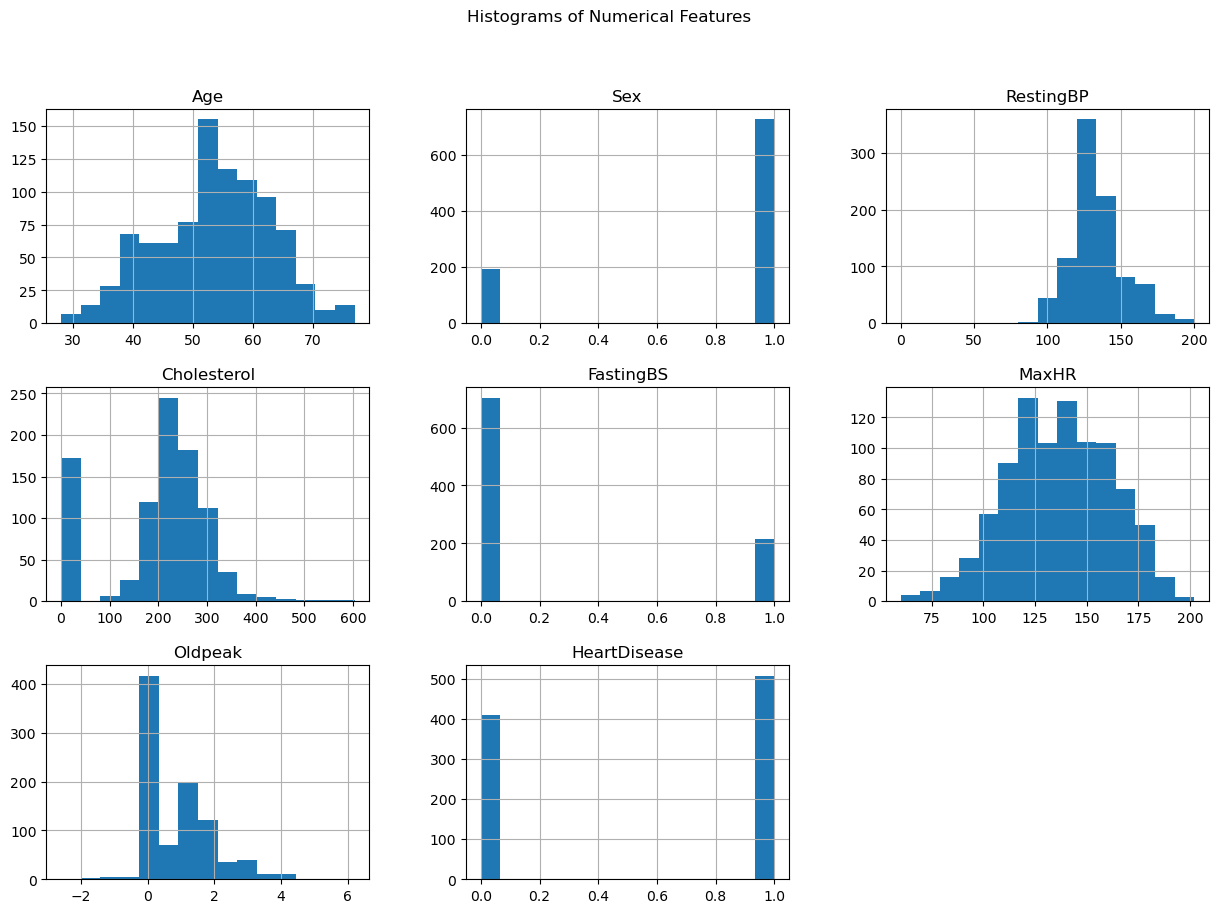

In [14]:
heart.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

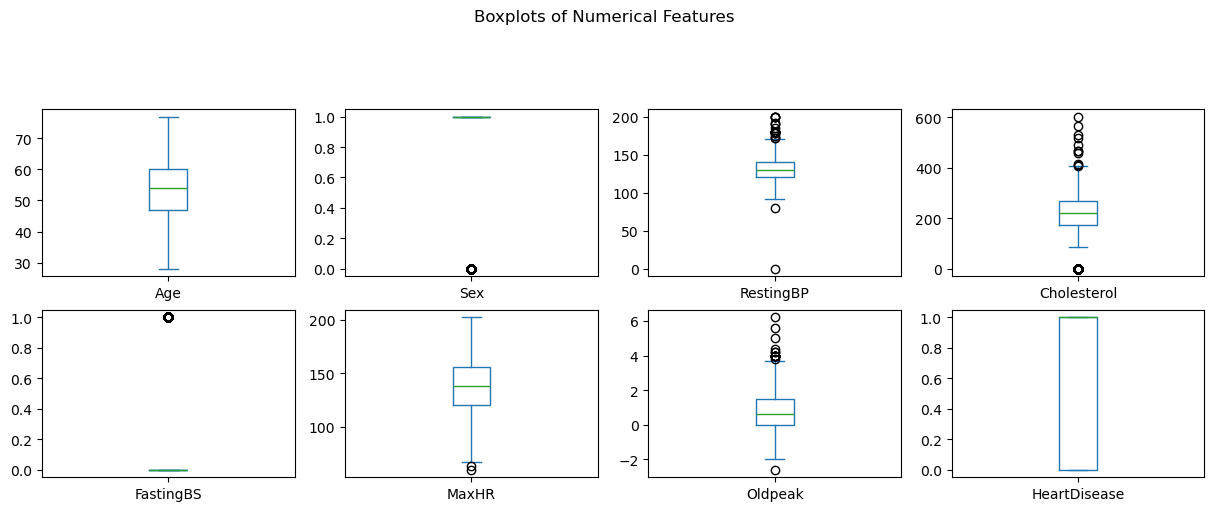

In [15]:
heart.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10))
plt.suptitle("Boxplots of Numerical Features")
plt.show()

In [19]:
from scipy import stats
import numpy as np
numeric_columns = heart.select_dtypes(include=[np.number]).columns
heart_cleaned = heart[(np.abs(stats.zscore(heart[numeric_columns])) < 3).all(axis=1)]

In [21]:
import pandas as pd
import numpy as np

# Assuming 'heart' is your DataFrame
numeric_columns = heart.select_dtypes(include=[np.number]).columns

# Filter DataFrame to include only numeric columns
numeric_heart = heart[numeric_columns]

# Calculate correlation matrix
correlation_matrix = numeric_heart.corr()
correlation_matrix


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [22]:
numeric_columns = heart.select_dtypes(include=[np.number]).columns
correlation_matrix = heart[numeric_columns].corr()
correlation_matrix

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


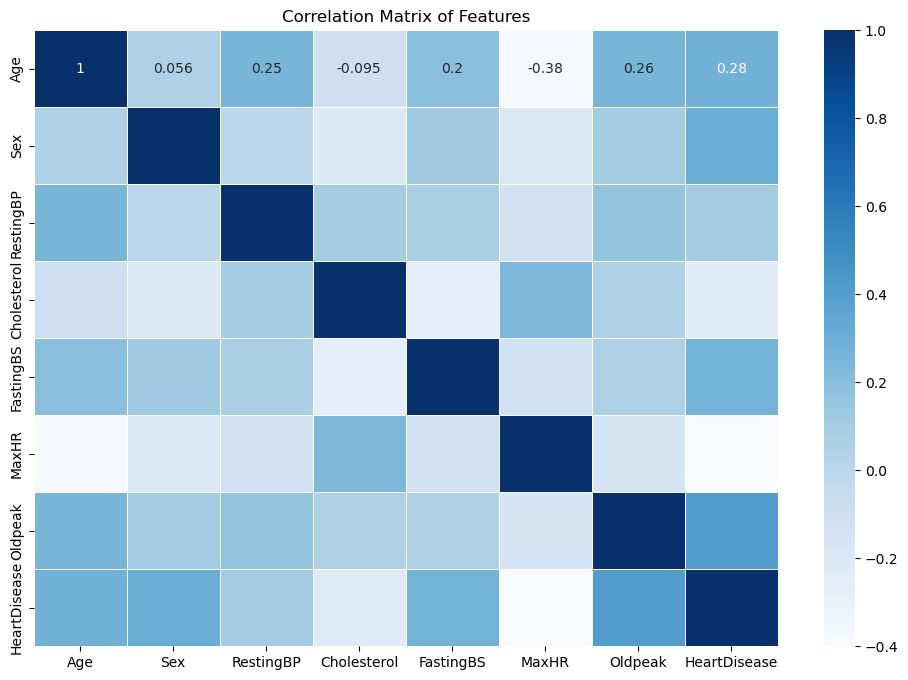

In [32]:
import seaborn as sns
# Heatmap visualization of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title("Correlation Matrix of Features")
plt.show()

C:\Users\Aswathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aswathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aswathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aswathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

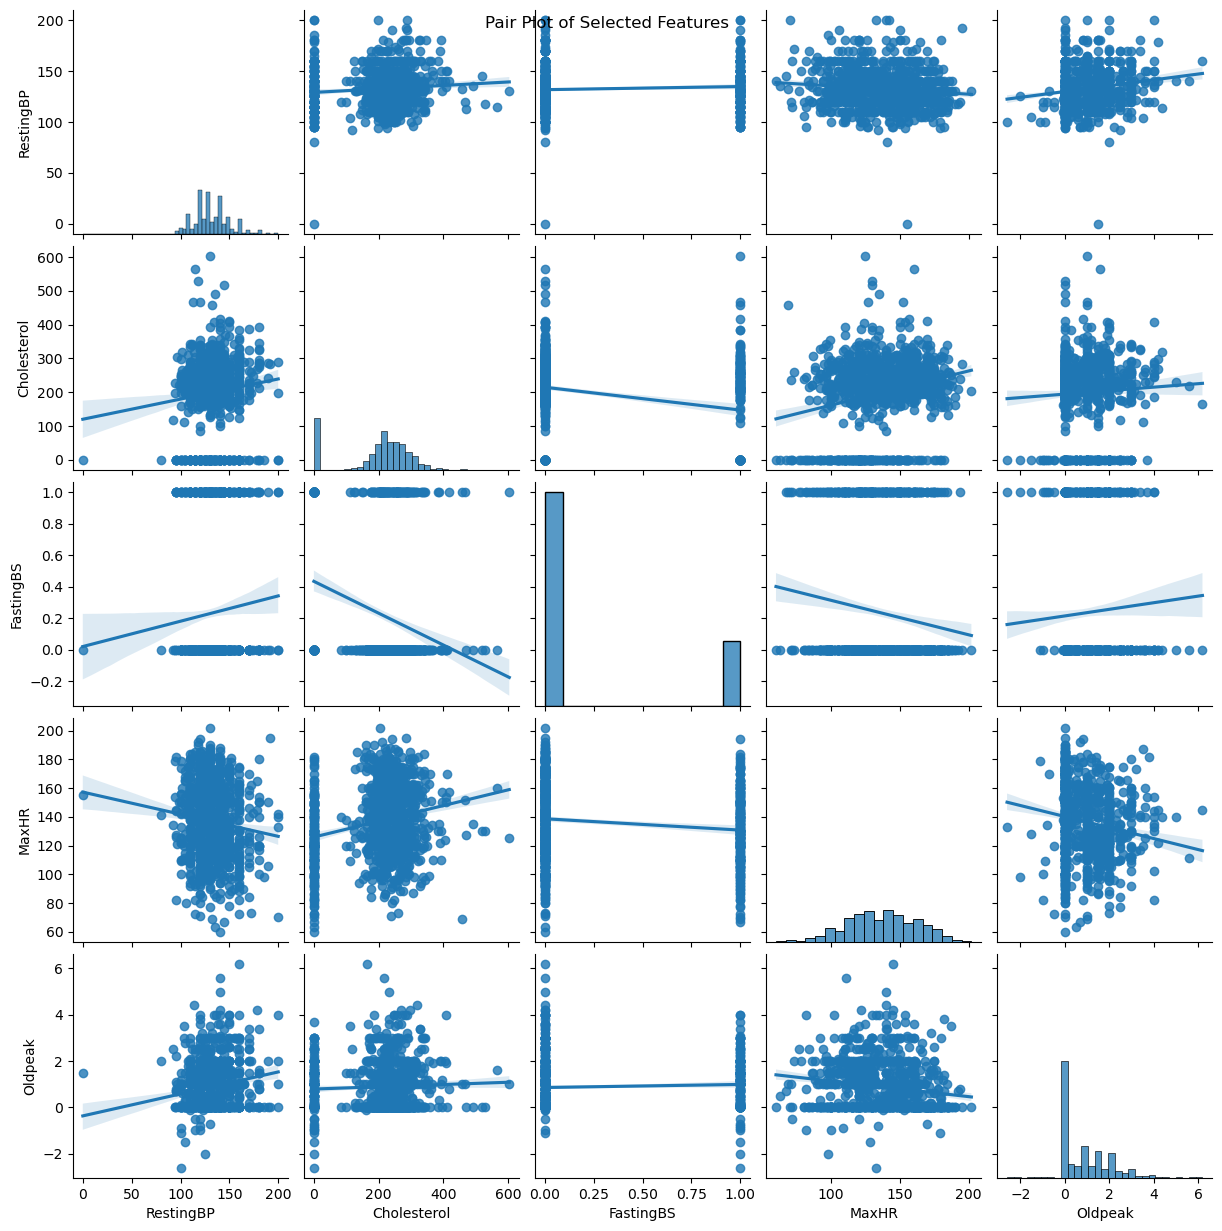

In [35]:
### Pair Plot for Selected Features

# Selecting a subset of features for pair plot
subset_features = ['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

# Pair plot
#sns.pairplot(heart[subset_features])
sns.pairplot(heart[subset_features], kind='reg')
plt.suptitle("Pair Plot of Selected Features")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# Selecting predictors by dropping the columns not needed
X = heart[[ 'RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]

# Target variable
Y = heart['HeartDisease']

# Splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Creating and fitting the logistic regression model
model_1= LogisticRegression()
model_1.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model_1.predict(X_train)
Y_test_pred = model_1.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))

Training Accuracy: 0.7779291553133515
Test Accuracy: 0.7228260869565217

Confusion Matrix (Train Data):
[[255  78]
 [ 85 316]]

Confusion Matrix (Test Data):
[[57 20]
 [31 76]]


In [38]:
# Selecting predictors by dropping the columns not needed
X = heart[['RestingBP','Cholesterol','FastingBS', ]]

# Target variable
Y = heart['HeartDisease']

# Splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Creating and fitting the logistic regression model
model_2= LogisticRegression()
model_2.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model_2.predict(X_train)
Y_test_pred = model_2.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))

Training Accuracy: 0.6389645776566758
Test Accuracy: 0.5978260869565217

Confusion Matrix (Train Data):
[[221 112]
 [153 248]]

Confusion Matrix (Test Data):
[[43 34]
 [40 67]]


In [10]:
# Selecting predictors by dropping the columns not needed
X = heart[['RestingBP','MaxHR','Oldpeak' ]]

# Target variable
Y = heart['HeartDisease']

# Splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Creating and fitting the logistic regression model
model_3= LogisticRegression()
model_3.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model_3.predict(X_train)
Y_test_pred = model_3.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))

Training Accuracy: 0.7520435967302452
Test Accuracy: 0.7010869565217391

Confusion Matrix (Train Data):
[[238  95]
 [ 87 314]]

Confusion Matrix (Test Data):
[[53 24]
 [31 76]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [43]:
# Selecting predictors
X = heart[['Age', 'Sex','RestingBP','Cholesterol']]
# Target variable
Y = heart['HeartDisease']

# For some models like KNN, we need to do feature scaling
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(X)
X_std = scaler.transform(X)

# Splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and fitting the KNN model with k=3
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred_knn = knn_model.predict(X_train)
Y_test_pred_knn = knn_model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy (KNN, k=3):", accuracy_score(Y_train, Y_train_pred_knn))
print("Test Accuracy (KNN, k=3):", accuracy_score(Y_test, Y_test_pred_knn))

print("\nConfusion Matrix (Train Data, KNN, k=3):")
print(confusion_matrix(Y_train, Y_train_pred_knn))

print("\nConfusion Matrix (Test Data, KNN, k=3):")
print(confusion_matrix(Y_test, Y_test_pred_knn))

Training Accuracy (KNN, k=3): 0.8174386920980926
Test Accuracy (KNN, k=3): 0.5760869565217391

Confusion Matrix (Train Data, KNN, k=3):
[[262  71]
 [ 63 338]]

Confusion Matrix (Test Data, KNN, k=3):
[[40 37]
 [41 66]]


In [44]:
# Selecting predictors
X = heart[['FastingBS','MaxHR','Oldpeak' ]] 				

# Target variable
Y = heart['HeartDisease']

# For some models like KNN, we need to do feature scaling
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(X)
X_std = scaler.transform(X)

# Splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and fitting the KNN model with k=4
knn_model= KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred_knn = knn_model.predict(X_train)
Y_test_pred_knn = knn_model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy (KNN, k=4):", accuracy_score(Y_train, Y_train_pred_knn))
print("Test Accuracy (KNN, k=4):", accuracy_score(Y_test, Y_test_pred_knn))

print("\nConfusion Matrix (Train Data, KNN, k=4):")
print(confusion_matrix(Y_train, Y_train_pred_knn))

print("\nConfusion Matrix (Test Data, KNN, k=4):")
print(confusion_matrix(Y_test, Y_test_pred_knn))

Training Accuracy (KNN, k=4): 0.7997275204359673
Test Accuracy (KNN, k=4): 0.6413043478260869

Confusion Matrix (Train Data, KNN, k=4):
[[306  27]
 [120 281]]

Confusion Matrix (Test Data, KNN, k=4):
[[63 14]
 [52 55]]


In [46]:
# Selecting predictors
X = heart[['RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak' ]] 				

# Target variable
Y = heart['HeartDisease']

# For some models like KNN, we need to do feature scaling
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaler.fit(X)
X_std = scaler.transform(X)

# Splitting the dataset into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and fitting the KNN model with k=5
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred_knn = knn_model.predict(X_train)
Y_test_pred_knn = knn_model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy (KNN, k=5):", accuracy_score(Y_train, Y_train_pred_knn))
print("Test Accuracy (KNN, k=5):", accuracy_score(Y_test, Y_test_pred_knn))

print("\nConfusion Matrix (Train Data, KNN, k=5):")
print(confusion_matrix(Y_train, Y_train_pred_knn))

print("\nConfusion Matrix (Test Data, KNN, k=5):")
print(confusion_matrix(Y_test, Y_test_pred_knn))

Training Accuracy (KNN, k=5): 0.7970027247956403
Test Accuracy (KNN, k=5): 0.6684782608695652

Confusion Matrix (Train Data, KNN, k=5):
[[255  78]
 [ 71 330]]

Confusion Matrix (Test Data, KNN, k=5):
[[51 26]
 [35 72]]


In [49]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import \
     (KMeans,AgglomerativeClustering)

In [170]:
heart_ = heart.drop(['HeartDisease','ChestPainType','RestingECG','ExerciseAngina','ST_Slope', 'FastingBS', 'Sex'], axis=1)
heart_

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ChestPainType_encoded,Clusters
0,40,140,289,172,0.0,1,1
1,49,160,180,156,1.0,2,1
2,37,130,283,98,0.0,1,2
3,48,138,214,108,1.5,0,2
4,54,150,195,122,0.0,2,2
...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,3,2
914,68,144,193,141,3.4,0,0
915,57,130,131,115,1.2,0,2
916,57,130,236,174,0.0,1,1


In [171]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_encoded,Clusters
0,40,1,1,140,289,0,1,172,0,0.0,2,0,1,1
1,49,0,2,160,180,0,1,156,0,1.0,1,1,2,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0,1,2
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0,2
4,54,1,2,150,195,0,1,122,0,0.0,2,0,2,2


In [172]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()
heart.loc[:, 'ChestPainType_encoded'] = le.fit_transform(heart['ChestPainType'])
# Encode the 'Province/territory' column numerically


# Select only numeric columns for correlation calculation
numeric_heart = heart.select_dtypes(include=[float, int])

# Add the encoded 'Province/territory' column to the numeric DataFrame
numeric_heart['ChestPainType_encoded'] = heart['ChestPainType_encoded']

In [173]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
heart_scaled = scaler.fit_transform(heart_)
heart_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.83243239,
         0.22903206, -0.36927804],
       [-0.47848359,  1.49175234, -0.17196105, ...,  0.10566353,
         1.27505906, -0.36927804],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.83243239,
         0.22903206,  0.5992855 ],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  0.29328271,
        -0.81699495,  0.5992855 ],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.83243239,
         0.22903206, -0.36927804],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.83243239,
         1.27505906, -0.36927804]])

In [174]:
kmeans = KMeans(n_clusters=4,
                random_state=2,
                n_init=20).fit(heart_scaled)

C:\Users\Aswathy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [175]:

heart.shape

(918, 14)

In [176]:
cluster_averages = heart_.groupby('Clusters').mean()

print(cluster_averages)

                Age   RestingBP  Cholesterol       MaxHR   Oldpeak  \
Clusters                                                             
0         56.820755  134.372642   145.863208  130.735849  0.960849   
1         48.626198  127.341853   234.159744  159.942492  0.305112   
2         55.218750  132.651786   182.406250  116.111607  0.462946   
3         56.142012  138.940828   221.443787  129.017751  2.436095   

          ChestPainType_encoded  
Clusters                         
0                      0.660377  
1                      1.067093  
2                      0.700893  
3                      0.508876  


In [177]:
kmeans.labels_

array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2,
       0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       2, 2, 1, 0, 0, 2, 2, 3, 0, 3, 3, 3, 3, 3, 3,

In [167]:
kmeans.inertia_

3423.7878913769864

In [168]:
ks = range(1, 10)
 
ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k,random_state=3, n_init=20).fit(heart_scaled)
 
    # append the inertial to a list
    ssr.append(model.inertia_)

C:\Users\Aswathy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Aswathy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Aswathy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Aswathy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

In [169]:
ssr

[6426.000000000001,
 4964.771355326262,
 3853.6645592802906,
 3423.7878913769864,
 3160.881112985044,
 2942.714731040035,
 2749.909375085421,
 2589.0080893750865,
 2459.73610150058]

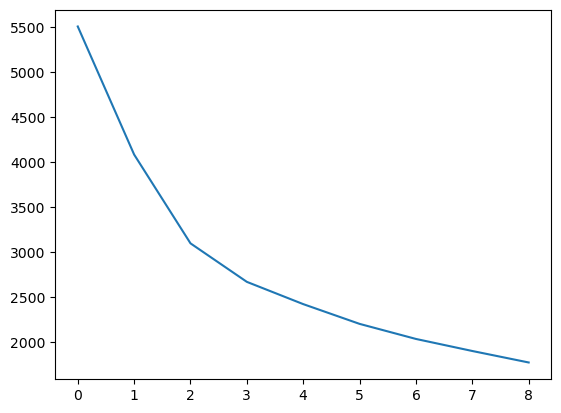

In [159]:
plt.plot(ssr)

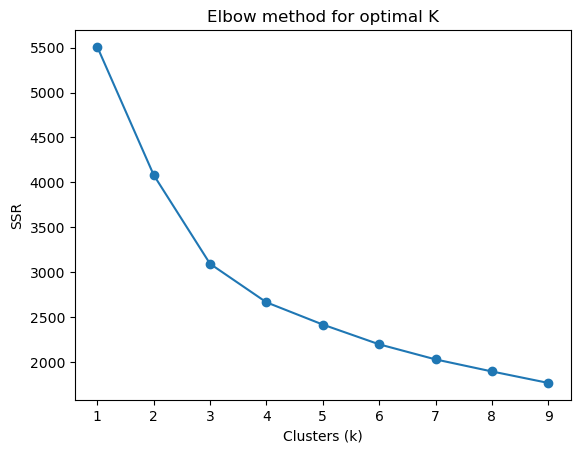

In [160]:
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
#plt.axvline(x=4,linestyle='--',c='grey')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
# Selecting predictors by dropping 'Sales' and target variable 'High'
X = heart.drop(['Age', 'HeartDisease'], axis=1)
X
# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid dummy variable trap
X_encoded


,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [57]:
# Target variable
Y = heart['HeartDisease']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=2)

# Creating and fitting the Decision Tree model on the training dataset
# model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=3) ##### Increasing max depth gives better training accuracy, but lower test accuracy
# model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# With more parameters:
#model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=0)

model.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))

Training Accuracy: 0.8555858310626703
Test Accuracy: 0.7989130434782609

Confusion Matrix (Train Data):
[[276  45]
 [ 61 352]]

Confusion Matrix (Test Data):
[[75 14]
 [23 72]]


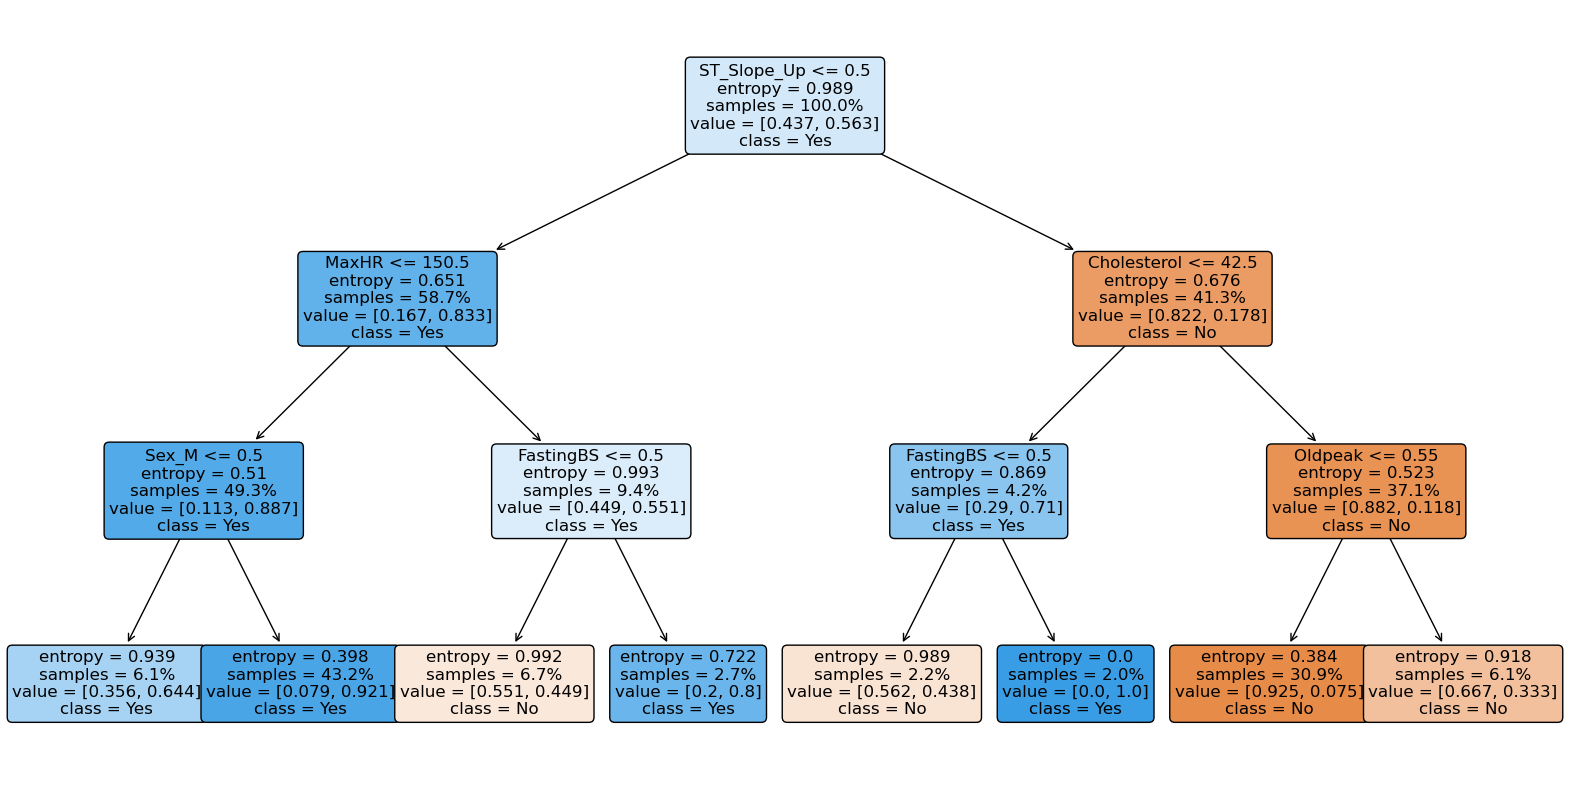

In [59]:
# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'], rounded=True, proportion=True, fontsize=12)
plt.show()

In [60]:
# Target variable
Y = heart['HeartDisease']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=2)

# Creating and fitting the Decision Tree model on the training dataset
# model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=4) ##### Increasing max depth gives better training accuracy, but lower test accuracy
# model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# With more parameters:
#model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=0)

model.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))

Training Accuracy: 0.8623978201634878
Test Accuracy: 0.7989130434782609

Confusion Matrix (Train Data):
[[254  67]
 [ 34 379]]

Confusion Matrix (Test Data):
[[67 22]
 [15 80]]


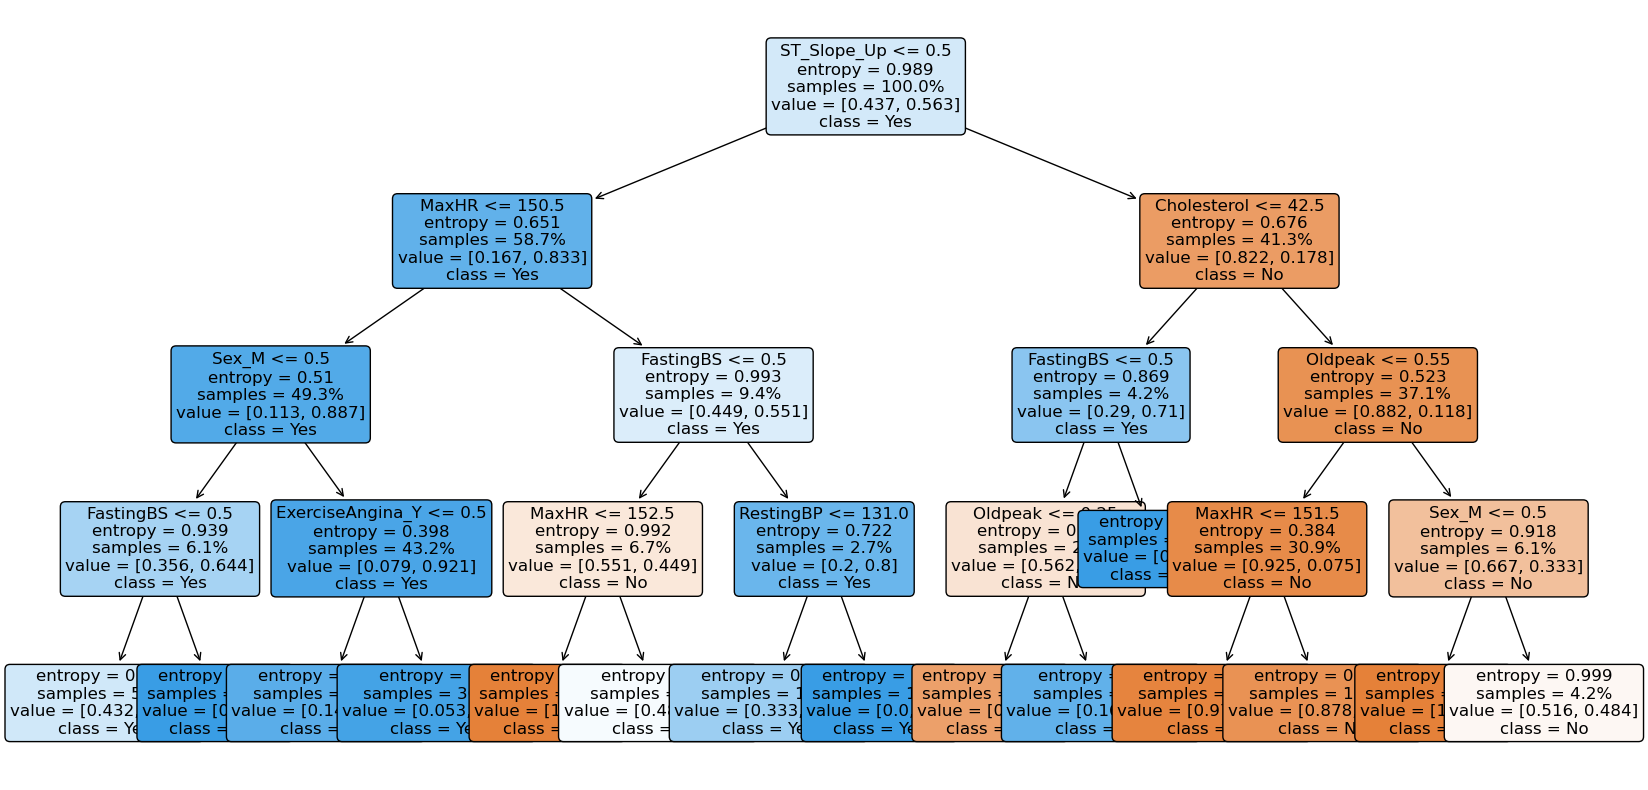

In [62]:
# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'], rounded=True, proportion=True, fontsize=12)
plt.show()

In [64]:
# Target variable
Y = heart['HeartDisease']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=2)

# Creating and fitting the Decision Tree model on the training dataset
# model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5) ##### Increasing max depth gives better training accuracy, but lower test accuracy
# model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# With more parameters:
#model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=0)

model.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [65]:
# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))

Training Accuracy: 0.8869209809264306
Test Accuracy: 0.8152173913043478

Confusion Matrix (Train Data):
[[268  53]
 [ 30 383]]

Confusion Matrix (Test Data):
[[69 20]
 [14 81]]


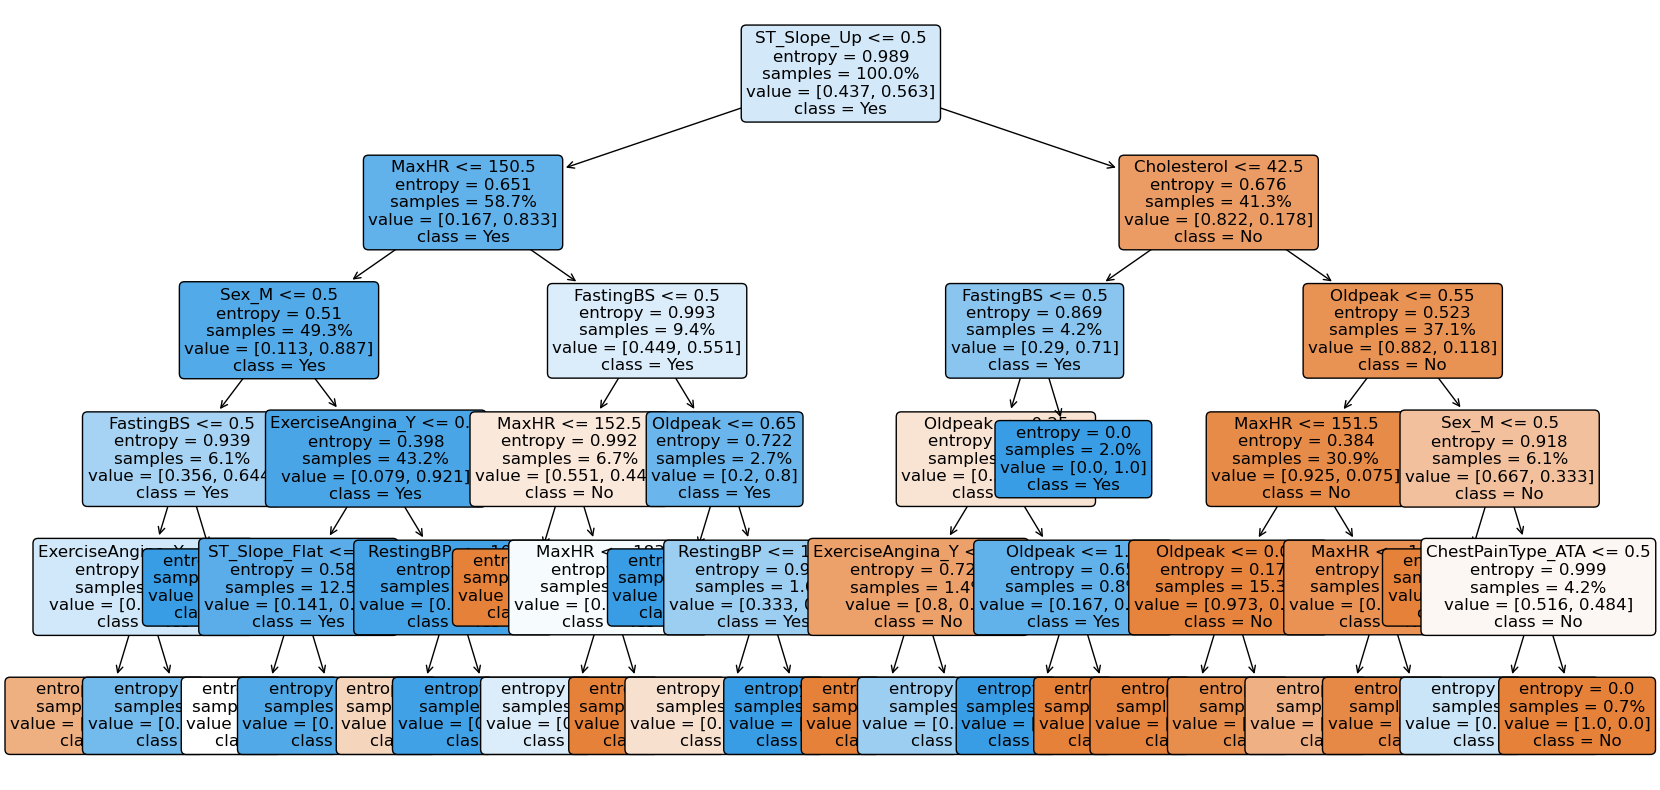

In [66]:
# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'], rounded=True, proportion=True, fontsize=12)
plt.show()

In [11]:

# 1. To handle data
import numpy as np
import pandas as pd

# 2.To visualise the data
import matplotlib. pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# 4. Machine learning
from sklearn.model_selection import train_test_split

# 5. For Classification task
from sklearn.linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import \
     (KMeans, AgglomerativeClustering)

# 6. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X and y are properly defined and accessible in your environment
# Make sure y is a pandas DataFrame or Series for .values.ravel()

num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Assuming y is a pandas DataFrame or Series, use .values.ravel()
# If y is not pandas, use np.ravel(y) instead

try:
    # Assuming y is a pandas DataFrame or Series
    cv_results = cross_val_score(knn, X, Y.values.ravel(), cv=kfold, scoring='accuracy')
except AttributeError:
    # If y is not pandas, use np.ravel(y)
    cv_results = cross_val_score(knn, X, np.ravel(y), cv=kfold, scoring='accuracy')

# Print cross-validation results
print("Cross-validation results (Accuracy):")
print(cv_results)
import pandas as pd

# Load your dataset and assign X and y
#data = pd.read_csv('heart.csv')
X = heart.drop(columns=['Age','Cholesterol'])
y = heart['HeartDisease']


Cross-validation results (Accuracy):
[0.64130435 0.76086957 0.65217391 0.65027322 0.6557377 ]


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'heart' is your DataFrame containing the data
# Selecting predictors (features) and target variable
X = heart[['Age', 'Cholesterol']]
Y = heart['HeartDisease']

# Number of folds for cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize KNeighborsClassifier with n_neighbors=7
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation and calculate accuracy scores
cv_results = cross_val_score(knn, X, Y.values.ravel(), cv=kfold, scoring='accuracy')

# Print cross-validation results
print("Cross-validation results (Accuracy):")
print(cv_results)
print(f"Mean Accuracy: {cv_results.mean()}")  # Calculate mean accuracy
print(f"Standard Deviation: {cv_results.std()}")  # Calculate standard deviation


Cross-validation results (Accuracy):
[0.60869565 0.66304348 0.60869565 0.63387978 0.66666667]
Mean Accuracy: 0.6361962461392255
Standard Deviation: 0.02516804221783795
